In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

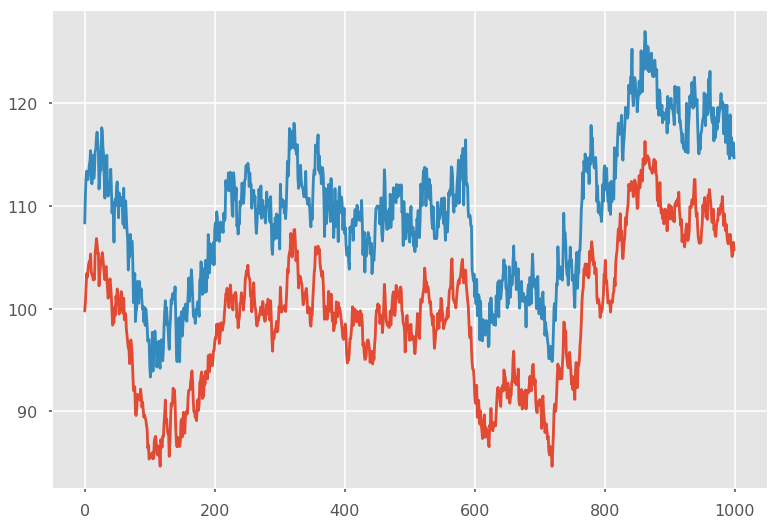

In [7]:
np.random.seed(2019)

# create synthetic price series
drift = 100
r1 = np.random.randn(1000)
s1 = pd.Series(np.cumsum(r1), name='s1') + drift


# make second series
offset = 10
noise = np.random.randn(1000)
s2 = s1 + offset + noise

# hedge ratio
plt.plot(s1)
plt.plot(s2)

In [8]:
s1.shape

(1000,)

In [11]:
s1.values.reshape(-1,1).shape

(1000, 1)

In [16]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1), s2.values.reshape(-1,1))
lr.coef_

array([[0.99958168]])

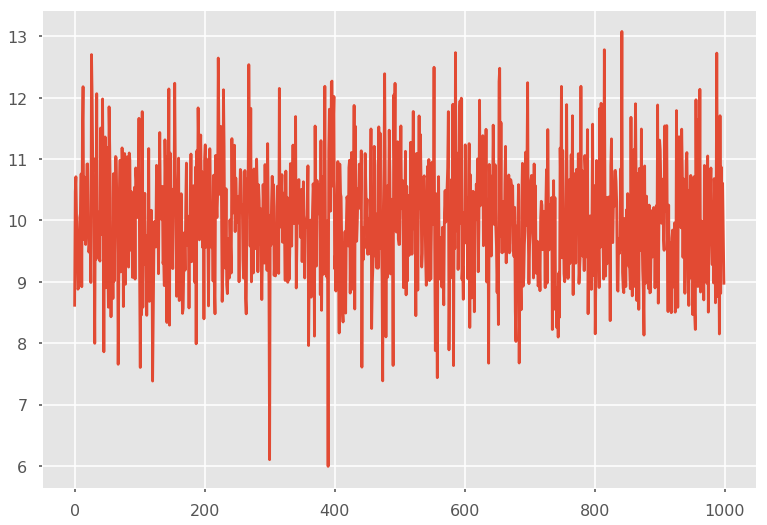

In [19]:
hedge_ratio = lr.coef_[0][0]
spread = s2 - s1 * hedge_ratio
plt.plot(spread)

### Check if spread is stationary using Augmented Dickey Fuller Test

The [adfuller](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) function is part of the statsmodel library.
```
adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)[source]

adf (float) – Test statistic
pvalue (float) – p-value
...
```

In [20]:
def is_spread_stationary(spread, p_level=0.05):
    '''
    Determines if a spread is stationary according to adfuller test
    
    Parameters
    ----------
    spread: pd.Series
        obtained from linear combination of two series with a hedge ratio
    p_level: float
        Level of significance required to reject null hypothesis of non-stationarity
        
    Returns
    -------
    result: bool
        a boolean that states if the spread is stationary
    '''
    
    adf_result = adfuller(spread)
    pvalue = adf_result[1]
    print('p-value from test: ', pvalue)
    if pvalue <= p_level:
        return True
    return False

In [21]:
is_spread_stationary(spread)

p-value from test:  0.0


True